In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("dataset/financial_news_events.csv", parse_dates=["Date"])

df["Sentiment"] = df["Sentiment"].astype(str).str.strip().str.title()
df["Impact_Level"] = df["Impact_Level"].astype(str).str.strip().str.title()

impact_map = {"Low": 1, "Medium": 2, "High": 3}
df["Impact_Level_Num"] = df["Impact_Level"].map(impact_map)

print("Rango temporal:", df["Date"].min(), "→", df["Date"].max())
print("\nFrecuencia de sentimientos:\n", df["Sentiment"].value_counts(normalize=True))
print("\nDistribución de niveles de impacto:\n", df["Impact_Level"].value_counts(normalize=True))

Rango temporal: 2025-02-01 00:00:00 → 2025-08-14 00:00:00

Frecuencia de sentimientos:
 Sentiment
Negative    0.322090
Neutral     0.314484
Positive    0.306878
Nan         0.056548
Name: proportion, dtype: float64

Distribución de niveles de impacto:
 Impact_Level
Medium    0.343585
Low       0.337302
High      0.319114
Name: proportion, dtype: float64


In [26]:
# Preprocesamiento

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Sentiment"] = df["Sentiment"].where(df["Sentiment"].notna(), np.nan)  # keep NaN as NaN
df["Sentiment"] = df["Sentiment"].str.strip().str.title()
df["Impact_Level"] = df["Impact_Level"].astype(str).str.strip().str.title()

impact_map = {"Low": 1, "Medium": 2, "High": 3}
df["Impact_Level_Num"] = df["Impact_Level"].map(impact_map)

# Eliminar filas con valores nulos en estas columnas
df = df.dropna(subset=["Date", "Sentiment", "Impact_Level"])

# Eliminar duplicados
df = df.drop_duplicates(subset=["Date", "Headline", "Source"])

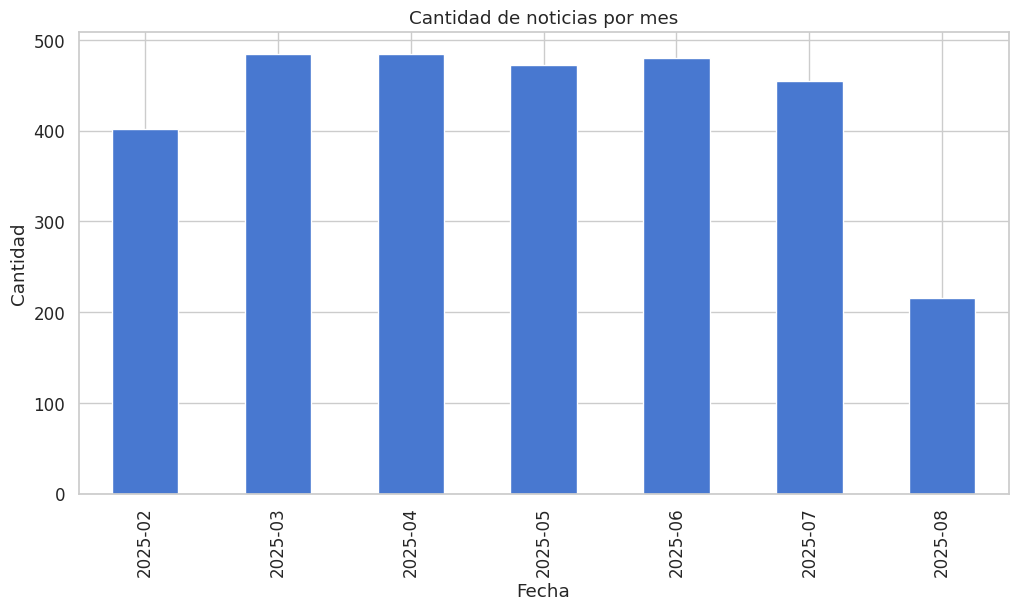

In [27]:
# Evolucion de noticias en el tiempo
plt.figure(figsize=(12,6))
df["Date"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")
plt.title("Cantidad de noticias por mes")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()

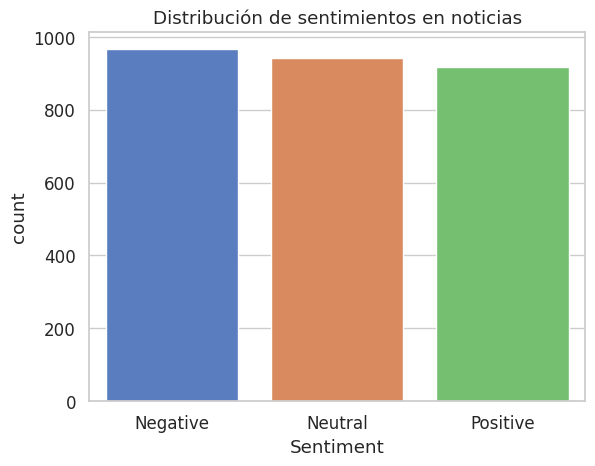

In [29]:
sns.countplot(x="Sentiment", data=df, order=["Negative","Neutral","Positive"])
plt.title("Distribución de sentimientos en noticias")
plt.show()


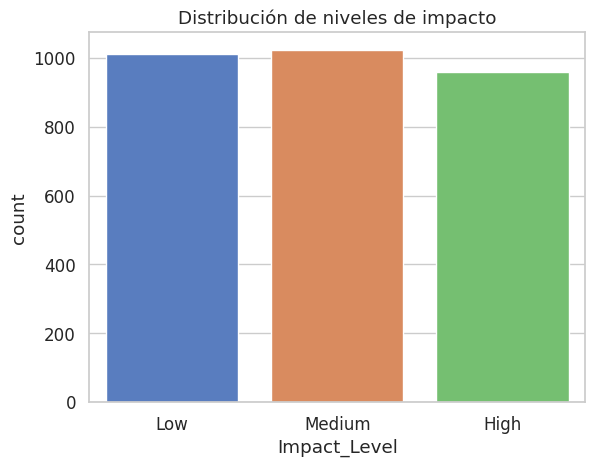

In [16]:
# Distribucion de Impact Level
sns.countplot(x="Impact_Level", data=df, order=["Low","Medium","High"])
plt.title("Distribución de niveles de impacto")
plt.show()

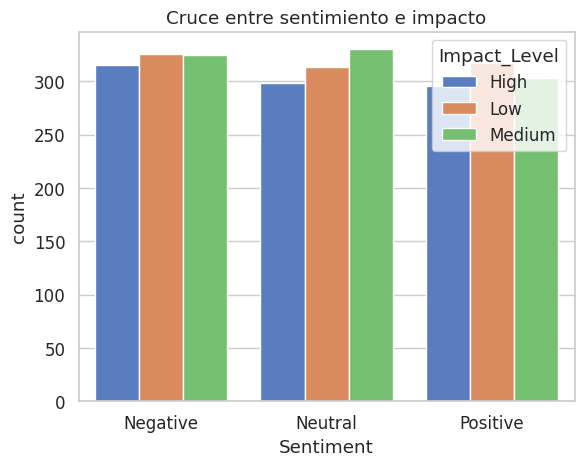

In [17]:
# Sentimiento vs Impact Level
sns.countplot(x="Sentiment", hue="Impact_Level", data=df,
              order=["Negative","Neutral","Positive"])
plt.title("Cruce entre sentimiento e impacto")
plt.show()